In [215]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

In [217]:
df=pd.read_csv("C:/Users/Usharani/PythonWork/marketing_data.csv")

### Data Description

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [222]:
df.columns =df.columns.str.strip()

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [226]:
df.shape

(2240, 28)

In [228]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### EDA
1.null value replce
2.Drop Duplicates
3.Data Format
4.Outlier handling
5.Spell error
6.junck characters

In [231]:
df.drop_duplicates()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [233]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [235]:
df['Income'] = df['Income'].replace({',': '', r'\$': ''}, regex=True)

In [237]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.00,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.00,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.00,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [239]:
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

In [241]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [243]:
print("Education Categories:", df['Education'].unique())

Education Categories: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [245]:
print("Marital_Status:", df['Marital_Status'].unique())

Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [247]:
df['Education'] = df['Education'].str.strip().str.lower()
df['Marital_Status'] = df['Marital_Status'].str.strip().str.lower()

In [249]:
df.groupby(['Education', 'Marital_Status'])['Income'].mean()

Education   Marital_Status
2n cycle    divorced          49395.130435
            married           46201.100000
            single            53673.944444
            together          44736.410714
            widow             51392.200000
basic       divorced           9548.000000
            married           21960.500000
            single            18238.666667
            together          21240.071429
            widow             22123.000000
graduation  absurd            79244.000000
            alone             34176.000000
            divorced          54526.042017
            married           50800.258741
            single            51322.182927
            together          55758.480702
            widow             54976.657143
master      absurd            65487.000000
            alone             61331.000000
            divorced          50331.945946
            married           53286.028986
            single            53530.560000
            together       

In [251]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [253]:
df['Total_Children']

0       0
1       0
2       1
3       2
4       1
       ..
2235    1
2236    1
2237    1
2238    0
2239    2
Name: Total_Children, Length: 2240, dtype: int64

In [255]:
df['Age'] = 2025 - df['Year_Birth']

In [257]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Total_Children',
       'Age'],
      dtype='object')

In [259]:
df['Total_Spending'] = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)

df['Total_Spending']



0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_Spending, Length: 2240, dtype: int64

In [261]:
df['Total_Purchases'] = df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [263]:
df1 = df[['Education', 'Marital_Status', 'Income', 'Total_Children', 'Age', 'Total_Spending', 'Total_Purchases','NumStorePurchases','NumWebPurchases']].copy()

In [265]:
print(df1)

       Education Marital_Status   Income  Total_Children  Age  Total_Spending  \
0     graduation       divorced  84835.0               0   55            1190   
1     graduation         single  57091.0               0   64             577   
2     graduation        married  67267.0               1   67             251   
3     graduation       together  32474.0               2   58              11   
4     graduation         single  21474.0               1   36              91   
...          ...            ...      ...             ...  ...             ...   
2235         phd       divorced  66476.0               1   49             689   
2236    2n cycle        married  31056.0               1   48              55   
2237  graduation       divorced  46310.0               1   49             309   
2238  graduation        married  65819.0               0   47            1383   
2239         phd        married  94871.0               2   56            1078   

      Total_Purchases  NumS

#### Outlier

In [268]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return  (len(data[data[column] < lower_bound])+len(data[data[column] > upper_bound]))/len(data)

In [270]:
num_cols = ['Income', 'Age', 'Total_Spending', 'Total_Purchases', 
            'NumWebPurchases',  'NumStorePurchases']

In [272]:
for col in num_cols:
    outlier_ratio = find_outliers_iqr(df1, col)
    print(f"{col} → {outlier_ratio:.2%} outliers")

Income → 0.36% outliers
Age → 0.13% outliers
Total_Spending → 0.13% outliers
Total_Purchases → 0.00% outliers
NumWebPurchases → 0.18% outliers
NumStorePurchases → 0.00% outliers


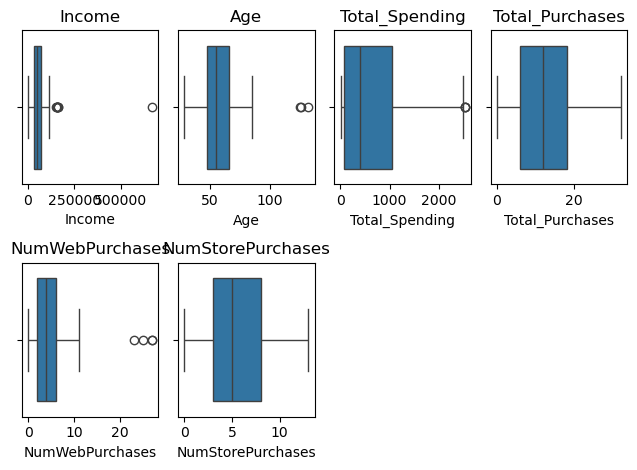

In [274]:
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Hypothesis Testing

### Chi square Test - Older people are not tech-savvy and probably prefer shopping in-store

In [278]:
df1['AgeGroup'] = df['Age'].apply(lambda x: 'Older' if x > 65 else 'Younger')

In [280]:
df1['Channel_Group'] = df.apply( lambda row: 'Web+Catalog' if (row['NumWebPurchases'] + row['NumCatalogPurchases']) > row['NumStorePurchases'] 
    else 'In-Store', 
    axis=1)


In [282]:
contingency_table = pd.crosstab(df1['AgeGroup'], df1['Channel_Group'])
print(contingency_table)

Channel_Group  In-Store  Web+Catalog
AgeGroup                            
Older               276          294
Younger             986          684


In [284]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)


Chi-Square Statistic: 19.058325789438545
Degrees of Freedom: 1
p-value: 1.2678342623718128e-05


In [286]:
alpha = 0.05
if(p_value < alpha):
    print("Reject the null hypothesis - Older people are not tech-savvy and probably prefer shopping in-store. ")
else:
    print("Fail to reject the null hypothesis -Older people are  tech-savvy and probably prefer shopping web-store.")

Reject the null hypothesis - Older people are not tech-savvy and probably prefer shopping in-store. 


### Ztest 

In [289]:
bins = [18, 29, 39, 49, 59, 69, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-65', '65+']
df1['Age_Range'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)
age_purchase_mean = df1.groupby('Age_Range')['NumStorePurchases'].mean().reset_index()

print(age_purchase_mean)


  Age_Range  NumStorePurchases
0     18-29                NaN
1     30-39           5.829932
2     40-49           5.130719
3     50-59           5.538674
4     60-65           6.106776
5       65+           6.585714


C:\Users\Usharani\AppData\Local\Temp\ipykernel_25856\2578508525.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase_mean = df1.groupby('Age_Range')['NumStorePurchases'].mean().reset_index()


In [291]:
ageLess65 = df1[df1['Age'] < 65]['NumStorePurchases']
ageGreater65 = df1[df1['Age'] > 65]['NumStorePurchases']

In [293]:
# Perform the two-sample Z-test
z_stat, p_value = ztest(ageLess65, ageGreater65)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: -5.337446741923179
P-value: 9.42645786660512e-08


## The bar chart shows tat older ppl prefer Instore purchase

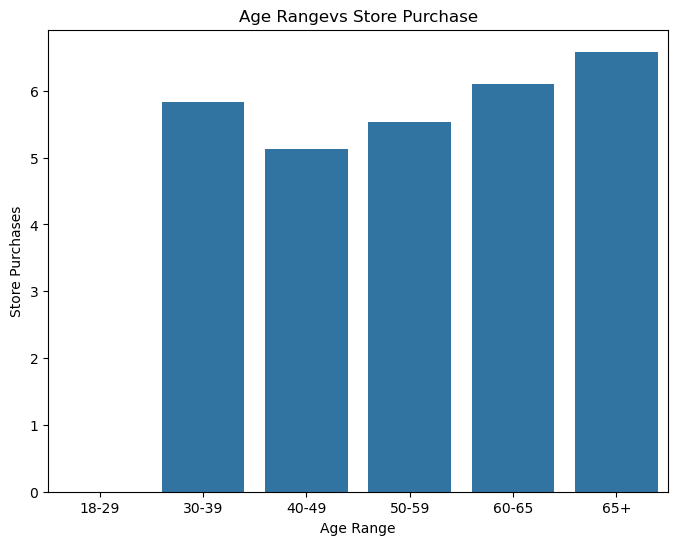

In [296]:
#o	Older people are not as tech-savvy and probably prefer shopping in-store.
plt.figure(figsize=(8, 6))
sns.barplot(data=age_purchase_mean, x='Age_Range', y='NumStorePurchases')
# Adding labels and title
plt.title('Age Rangevs Store Purchase')
plt.xlabel('Age Range')
plt.ylabel('Store Purchases')
plt.show()

### H0-Customers with kids probably have less time to visit a store and would prefer to shop online.

In [299]:
df1['Has_Children'] = df1['Total_Children'].apply(lambda x: 1 if x > 0 else 0)
# age_purchase_web = df1.groupby('Has_Children')['NumStorePurchases'].mean().reset_index()
df1['Channel_Group'] = df.apply(
    lambda row: 'Web' if (row['NumWebPurchases'] ) > row['NumStorePurchases']
    else 'In-Store', 
    axis=1
)
child_channel_tab = pd.crosstab(df1['Has_Children'], df1['Channel_Group'])
print(child_channel_tab)


Channel_Group  In-Store  Web
Has_Children                
0                   568   70
1                  1302  300


In [301]:
chi2, p, dof, expected = stats.chi2_contingency(child_channel_tab)
print("Chi-square:", chi2)
print("p-value:", p)

Chi-square: 19.340527323545967
p-value: 1.0936040498993082e-05


In [303]:
alpha = 0.05
if(p_value < alpha):
    print("Reject the null hypothesis -Customers with kids also  visit a store ")
else:
    print("Fail to reject the null hypothesis -Customers with kids probably have less time to visit a store and would prefer to shop online.")

Reject the null hypothesis -Customers with kids also  visit a store 


In [305]:
child_channel_long = child_channel_tab.reset_index().melt(
    id_vars='Has_Children',
    var_name='Channel',
    value_name='Count'
)
child_channel_long

,Has_Children,Channel,Count
0,0,In-Store,568
1,1,In-Store,1302
2,0,Web,70
3,1,Web,300


<Axes: xlabel='Has_Children', ylabel='Count'>

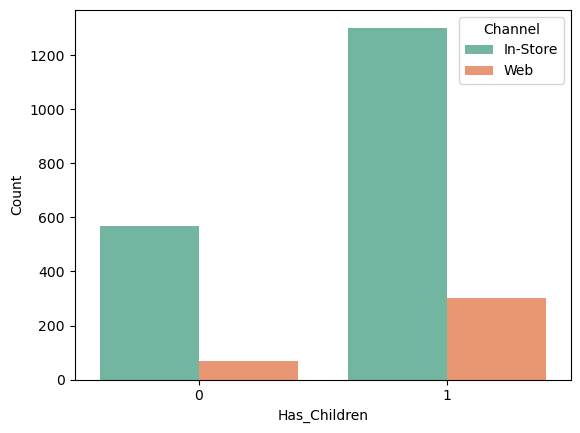

In [307]:
sns.barplot(data=child_channel_long, x='Has_Children', y='Count', hue='Channel', palette='Set2')


### h0- There is no caniibilation of other distribution channle

In [310]:
df1['Web_Catalog'] = df['NumWebPurchases'] + df['NumCatalogPurchases']

In [312]:
median_val = df1['Web_Catalog'].median()
median_val

6.0

In [314]:
group1 = df1[df1['Web_Catalog'] > median_val]['NumStorePurchases']
group2 = df1[df1['Web_Catalog'] <= median_val]['NumStorePurchases']


In [316]:
mean_diff = group1.mean() - group2.mean()

In [318]:
std1 = np.sqrt((group1.std()**2 / len(group1)) + (group2.std()**2 / len(group1)))
z_score = mean_diff / std1
p_value = stats.norm.cdf(z_score)  # One-tailed test (if expecting lower)

In [320]:
print("Z-score:", z_score)
print("P-value:", p_value)

Z-score: 39.885936683998914
P-value: 1.0


In [322]:
alpha = 0.05
if(p_value < alpha):
    print("Reject the null hypothesis -There is  canibilation of other distribution channel ")
else:
    print("Fail to reject the null hypothesis -There is no canibilation of other distribution channle")

Fail to reject the null hypothesis -There is no canibilation of other distribution channle


### Does the US fare significantly better than the rest of the world in terms of total purchases?

In [325]:
df.groupby('Country')['Total_Spending'].mean()

Country
AUS     561.018750
CA      628.850746
GER     624.275000
IND     537.060811
ME     1040.666667
SA      626.323442
SP      604.767123
US      622.770642
Name: Total_Spending, dtype: float64

In [327]:
us_data = df[df['Country'] == 'US']['Total_Spending']
other_data = df[df['Country'] != 'US']['Total_Spending']
n_us = len(us_data)
n_row = len(other_data)

In [329]:
mean_us = np.mean(us_data)
mean_us

622.7706422018349

In [331]:
mean_row = np.mean(other_data)
mean_row

604.9300797747536

In [333]:
std_us = np.std(us_data, ddof=1)   # Sample standard deviation
std_row = np.std(other_data, ddof=1)

In [335]:
z_score = (mean_us - mean_row) / np.sqrt((std_us**2 / n_us) + (std_row**2 / n_row))

In [337]:
# Calculate p-value (one-tailed test)
p_value = 1 - stats.norm.cdf(z_score)
p_value

0.37286077479695057

In [339]:
if p_value < 0.05:
    print("Reject the null hypothesis:No Difference from the rest of the world.")
else:
    print("Fail to reject the null hypothesis: Significant difference in total purchases.")

Fail to reject the null hypothesis: Significant difference in total purchases.


### Visualization

### Best and Worst Performing Products in Terms of Revenue

In [343]:
product_revenue = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                      'MntSweetProducts', 'MntGoldProds']].sum()
product_revenue_sorted = product_revenue.sort_values(ascending=True)

## Inference-The trend shows the performance of the product in ascending order

C:\Users\Usharani\AppData\Local\Temp\ipykernel_25856\787257633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y=product_revenue_sorted.values, palette="coolwarm")


<Axes: xlabel='None'>

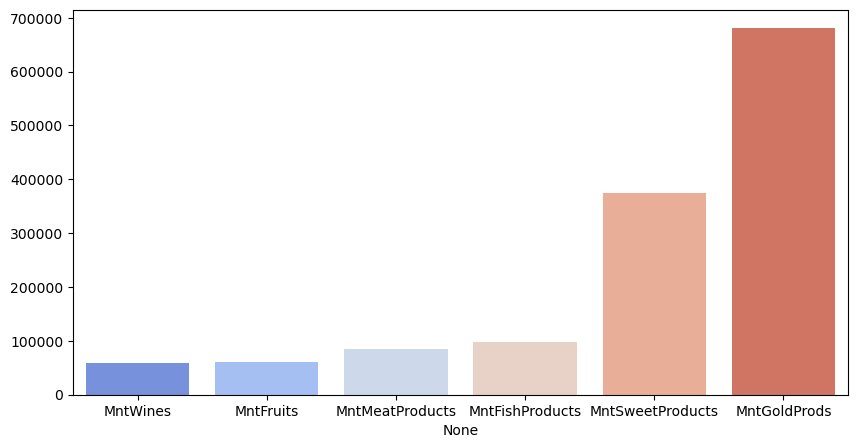

In [346]:
plt.figure(figsize=(10, 5))
sns.barplot(x=product_revenue.index, y=product_revenue_sorted.values, palette="coolwarm")


### Pattern Between Age and Last Campaign Acceptance Rate

In [349]:
age_acceptance = df.groupby('Age')['AcceptedCmp5'].mean().reset_index()


<Axes: xlabel='Age', ylabel='AcceptedCmp5'>

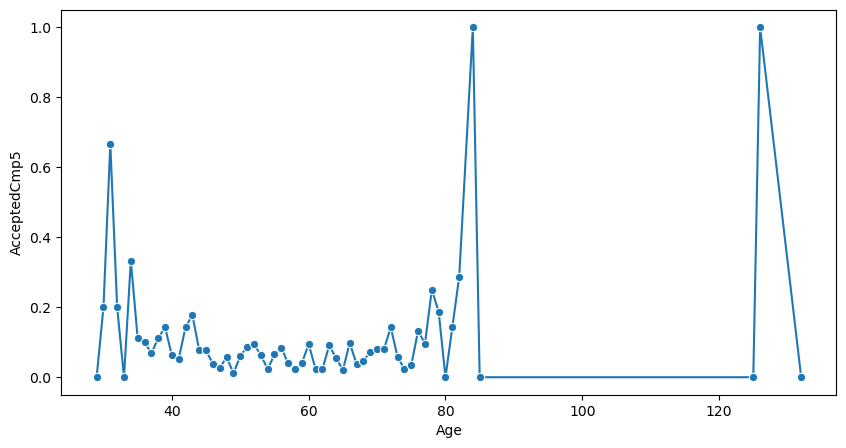

In [351]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Age', y='AcceptedCmp5', data=age_acceptance, marker="o")

In [352]:
##  Inference-The trend shows the older ppl have significatly accepted the last campagin

### Country with the Most Customers Who Accepted the Last Campaign

<Axes: xlabel='Country', ylabel='AcceptedCmp5'>

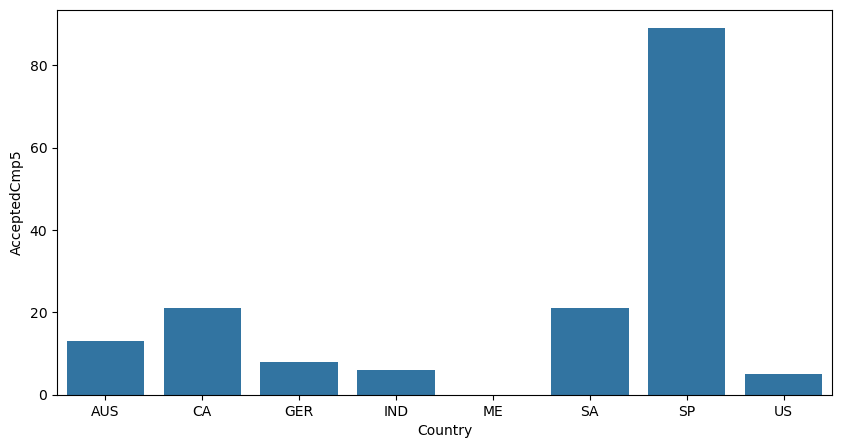

In [356]:
country_acceptance = df.groupby('Country')['AcceptedCmp5'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(y='AcceptedCmp5', x='Country', data=country_acceptance)

##  Inference-The trend shows the country have significatly accepted the last campagin

### Pattern Between Number of Children at Home and Total Spend

In [359]:
df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                       'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['TotalSpend'] 

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: TotalSpend, Length: 2240, dtype: int64

C:\Users\Usharani\AppData\Local\Temp\ipykernel_25856\141187997.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Children', y='TotalSpend', data=df, palette="coolwarm")


<Axes: xlabel='Total_Children', ylabel='TotalSpend'>

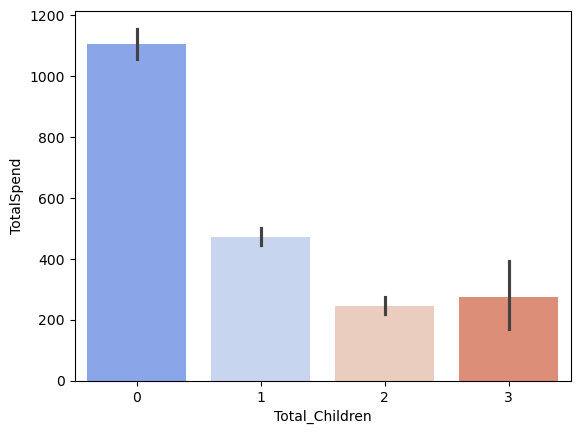

In [362]:
sns.barplot(x='Total_Children', y='TotalSpend', data=df, palette="coolwarm")

### ##  Inference-The trend shows people with no children tend to spend more

### Education Background of Customers Who Complained in the Last 2 Years

In [366]:
education_complaints = df[df['Complain'] == 1]['Education'].value_counts()
education_complaints

Education
graduation    14
2n cycle       4
master         2
phd            1
Name: count, dtype: int64

C:\Users\Usharani\AppData\Local\Temp\ipykernel_25856\294669401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_complaints.index, y=education_complaints.values, palette="coolwarm")


<Axes: xlabel='Education'>

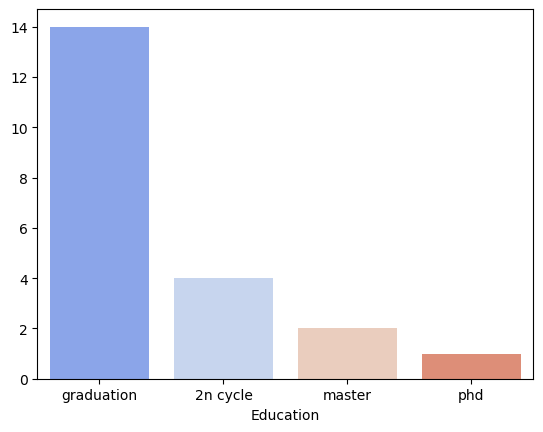

In [368]:
sns.barplot(x=education_complaints.index, y=education_complaints.values, palette="coolwarm")

##  Inference-The trend shows the undergraduate ppl complain more than the PG group

<Axes: xlabel='Marital_Status', ylabel='Total_Spending'>

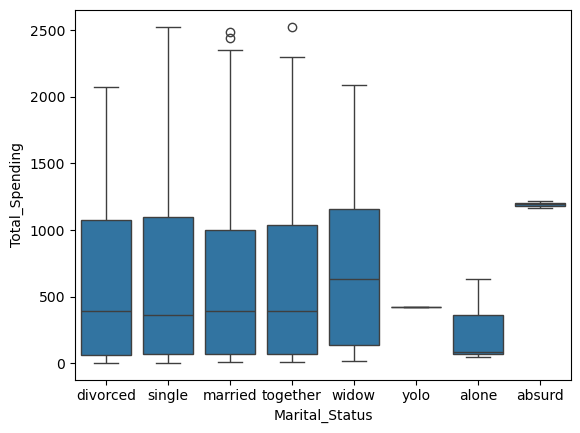

In [371]:
sns.boxplot(data=df1,x='Marital_Status',y='Total_Spending')